In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
l = models.Sequential()
l.add(layers.Input(shape=(32, 32, 3)))   # Explicit Input layer
l.add(layers.Conv2D(32, (3, 3), activation='relu'))
l.add(layers.MaxPooling2D((2, 2)))
l.add(layers.Conv2D(64, (3, 3), activation='relu'))
l.add(layers.MaxPooling2D((2, 2)))
l.add(layers.Conv2D(64, (3, 3), activation='relu'))

l.summary()
import matplotlib.pyplot as plt

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test , num_classes)

In [9]:
model = models.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/15
625/625 - 38s - 61ms/step - accuracy: 0.4575 - loss: 1.4978 - val_accuracy: 0.5640 - val_loss: 1.2254
Epoch 2/15
625/625 - 33s - 53ms/step - accuracy: 0.6077 - loss: 1.1108 - val_accuracy: 0.6267 - val_loss: 1.0603
Epoch 3/15
625/625 - 45s - 71ms/step - accuracy: 0.6650 - loss: 0.9515 - val_accuracy: 0.6713 - val_loss: 0.9412
Epoch 4/15
625/625 - 59s - 95ms/step - accuracy: 0.7065 - loss: 0.8399 - val_accuracy: 0.6843 - val_loss: 0.9195
Epoch 5/15
625/625 - 40s - 64ms/step - accuracy: 0.7345 - loss: 0.7624 - val_accuracy: 0.6997 - val_loss: 0.8745
Epoch 6/15
625/625 - 47s - 75ms/step - accuracy: 0.7602 - loss: 0.6861 - val_accuracy: 0.7051 - val_loss: 0.8571
Epoch 7/15
625/625 - 48s - 77ms/step - accuracy: 0.7824 - loss: 0.6220 - val_accuracy: 0.7210 - val_loss: 0.8193
Epoch 8/15
625/625 - 67s - 107ms/step - accuracy: 0.8036 - loss: 0.5586 - val_accuracy: 0.7328 - val_loss: 0.8156
Epoch 9/15
625/625 - 54s - 86ms/step - accuracy: 0.8231 - loss: 0.5053 - val_accuracy: 0.7213 -

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy = {test_acc:.3f}")

Test accuracy = 0.717


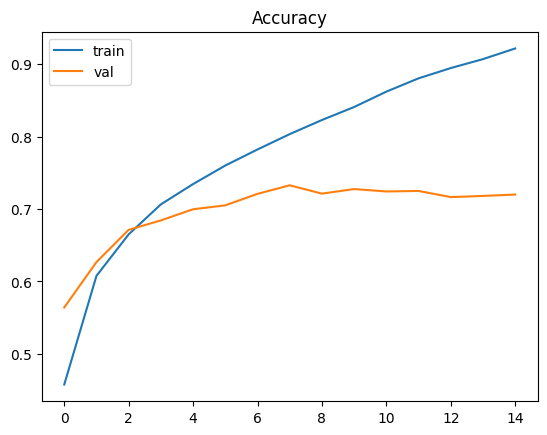

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title('Accuracy')
plt.show()